<a href="https://colab.research.google.com/github/dougyd92/ML-Foudations/blob/main/Projects/Project_2_Bot_or_Not_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Bot or Not? Detecting Fake Accounts with Classification

*Machine Learning Foundations for Beginners*

*Codecademy Live Learning*

# ⚠️ IMPORTANT: Save Your Own Copy Before You Start!

You are viewing a **read-only** notebook. Colab will let you run code and make edits, but **your changes will NOT be saved** unless you make your own copy first.

**Do this now, before anything else:**

1. Go to **File → Save a copy in Drive** (or **File → Save a copy in GitHub** if you prefer)
2. Verify that your notebook title now says **"Copy of..."** or is saved in your own Drive/repo
3. Continue working **only in your copy**
4. Once this is done, feel free to delete this warning.

If you're not sure whether you're in your own copy, check the title bar at the top of the page.

# Overview

At companies like Meta, detecting spam accounts and fake profiles is a core machine learning problem. Rather than analyzing what accounts *say*, these systems focus on how accounts *behave* — features like posting frequency, account age, follower-to-following ratio, and profile completeness.

In this project, you will use account-level behavioral features to classify Twitter accounts as **bots** or **legitimate human users**. You will train and compare two different classifiers — logistic regression and random forest — and evaluate them using the classification metrics from class.

## Learning Objectives
- Train and compare classification models (logistic regression vs. random forest)
- Evaluate classifiers using confusion matrices, precision, recall, F1, and ROC/AUC
- Interpret feature importances from a tree-based model
- Think critically about error types and their real-world consequences

## Core Requirements
1. Complete the data preprocessing (train/test split and feature scaling)
2. Train a logistic regression model
3. Train a random forest model
4. Evaluate and compare both models using the provided helper function
5. Interpret feature importances
6. Answer the short reflection questions

## Optional Enhancements (Bonus)
- Try XGBoost or SVM
- Hyperparameter tuning with GridSearchCV
- Threshold tuning with precision-recall curves

## Due Date
**March 4 at 7:00PM EST.**

This is a soft deadline i.e. late submissions are allowed and will not be penalized. 
However, we'll start Project 3 immediately after, so try to stick to this schedule
to avoid falling behind.

## How to Submit ##
When you are finished, share a link to your notebook in the #project-showcase channel in Discord. 

Also considering creating a git repo and publishing your notebook on GitHub.

# Getting the Dataset

We will use the **Twitter Bot Accounts** dataset from Kaggle. This dataset contains ~37,000 Twitter accounts labeled as bot or human, with behavioral features like follower count, posting frequency, and account age.

**Download instructions:**

1. Go to: https://www.kaggle.com/datasets/davidmartngutirrez/twitter-bots-accounts/versions/2
2. You will need a free Kaggle account to download
3. **Important:** Download **Version 2** of the dataset (use the version selector on the page). Version 2 contains all the feature columns we need.
4. Unzip the downloaded file. You should have a CSV file.
5. Upload it to this Colab notebook using the cell below.

**Licensing note:** This dataset is for educational use. Do not redistribute the raw data in your portfolio. Instead, link to the original Kaggle source.

# Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, f1_score
)

# Reproducibility
np.random.seed(42)

# Plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [9]:
df = pd.read_csv('twitter_human_bots_dataset.csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (37438, 20)


,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


# Exploratory Data Analysis

This section is pre-completed. Read through the plots and observations — they will inform the modeling decisions later.

## Column Descriptions

| Column | Type | Role | Description |
|--------|------|------|-------------|
| `Unnamed: 0` | int | Drop | Row index from the original CSV |
| `created_at` | str | Drop | Account creation timestamp |
| `default_profile` | bool | Feature | True if the user has not customized their profile |
| `default_profile_image` | bool | Feature | True if the user still has the default avatar |
| `description` | str | Drop | Free-text bio (not usable without NLP) |
| `favourites_count` | int | Feature | Number of tweets the user has liked |
| `followers_count` | int | Feature | Number of followers |
| `friends_count` | int | Feature | Number of accounts the user follows |
| `geo_enabled` | bool | Feature | True if the user has enabled geolocation |
| `id` | int | Drop | Unique Twitter user ID |
| `lang` | str | Drop | UI language setting |
| `location` | str | Drop | Self-reported location text |
| `profile_background_image_url` | str | Drop | URL of the profile background image |
| `profile_image_url` | str | Drop | URL of the profile avatar |
| `screen_name` | str | Drop | Twitter handle (unique identifier) |
| `statuses_count` | int | Feature | Total number of tweets posted |
| `verified` | bool | Feature | True if Twitter has verified the account |
| `average_tweets_per_day` | float | Feature | Tweets per day over the account's lifetime |
| `account_age_days` | int | Feature | Days since the account was created |
| `account_type` | str | **Target** | `"bot"` or `"human"` |

In [10]:
print(f'Dataset shape: {df.shape}\n')
print('--- Data Types ---')
print(df.dtypes.to_string())
print(f'\n--- Summary Statistics (numeric columns) ---')
df.describe().round(2)

Dataset shape: (37438, 20)

--- Data Types ---
Unnamed: 0                        int64
created_at                       object
default_profile                    bool
default_profile_image              bool
description                      object
favourites_count                  int64
followers_count                   int64
friends_count                     int64
geo_enabled                        bool
id                                int64
lang                             object
location                         object
profile_background_image_url     object
profile_image_url                object
screen_name                      object
statuses_count                    int64
verified                           bool
average_tweets_per_day          float64
account_age_days                  int64
account_type                     object

--- Summary Statistics (numeric columns) ---


,Unnamed: 0,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.00,37438.00,3.743800e+04,37438.00,3.743800e+04,37438.00,37438.00,37438.00
mean,18718.50,12302.06,3.703098e+05,4445.93,1.221536e+17,21073.39,6.89,3022.13
std,10807.56,33923.65,2.470829e+06,49545.20,3.004313e+17,67329.77,24.58,1013.70
min,0.00,0.00,0.000000e+00,0.00,4.180000e+02,0.00,0.00,483.00
25%,9359.25,362.00,3.500000e+01,37.00,9.957306e+07,1336.25,0.50,2316.25
50%,18718.50,2066.00,3.650000e+02,296.00,3.991474e+08,4209.00,1.49,3219.00
75%,28077.75,8879.00,8.440250e+03,893.00,2.453826e+09,17153.75,5.53,3888.00
max,37437.00,885123.00,1.216415e+08,4343060.00,1.120974e+18,2771910.00,1269.06,5158.00


## Class Balance

The dataset contains roughly 67% human accounts and 33% bot accounts. This is moderately imbalanced — accuracy alone could be misleading, so we will also rely on precision, recall, and F1.

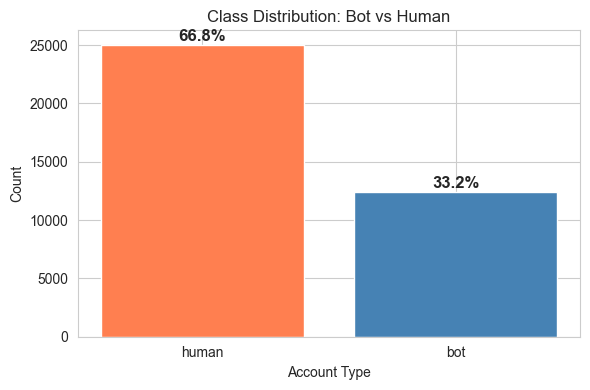

In [11]:
counts = df['account_type'].value_counts()
pcts = df['account_type'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(counts.index, counts.values, color=['coral', 'steelblue'])
for bar, pct in zip(bars, pcts.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 300,
            f'{pct:.1f}%', ha='center', fontsize=12, fontweight='bold')
ax.set_title('Class Distribution: Bot vs Human')
ax.set_ylabel('Count')
ax.set_xlabel('Account Type')
plt.tight_layout()
plt.show()

## Feature Distributions: Bot vs. Human

The plots below compare key behavioral features between bot and human accounts. Log scale is used where features are heavily right-skewed (skewness > 5).

In [12]:
def plot_feature_distribution(feature, use_log=False):
    colors = {'human': 'steelblue', 'bot': 'coral'}
    fig, ax = plt.subplots(figsize=(10, 4))
    for label, color in colors.items():
        subset = df[df['account_type'] == label][feature]
        if use_log:
            subset = subset.clip(lower=1)  # avoid log(0)
            ax.hist(subset, bins=np.logspace(np.log10(1),np.log10(df[feature].max()),50), alpha=0.5, label=label, color=color, log=False)
            ax.set_xscale('log')
        else:
            ax.hist(subset, bins=60, alpha=0.5, label=label, color=color)
    ax.set_title(f'{feature} — Bot vs Human')
    ax.set_xlabel(feature + (' (log scale)' if use_log else ''))
    ax.set_ylabel('Count')
    ax.legend()
    plt.tight_layout()
    plt.show()

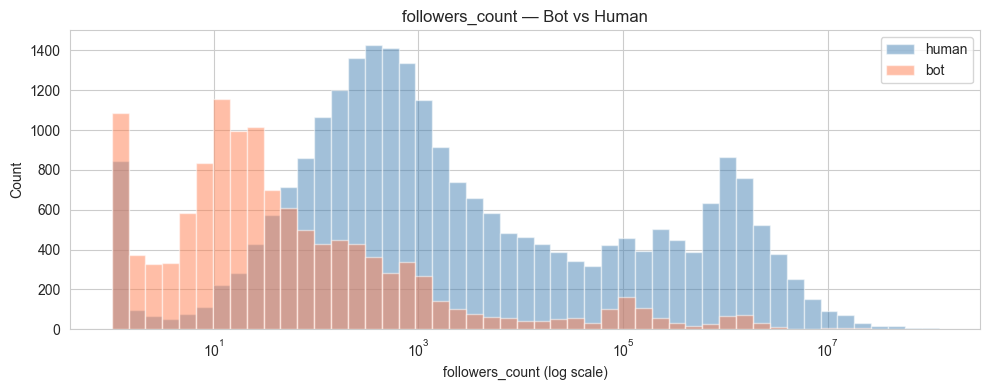

In [13]:
plot_feature_distribution('followers_count', True)

**followers_count**: Human accounts show a broad distribution peaking around 10²–10³ followers with a second bump at 10⁵–10⁶ (likely verified/celebrity accounts), while bots cluster heavily at the low end (under 10¹).

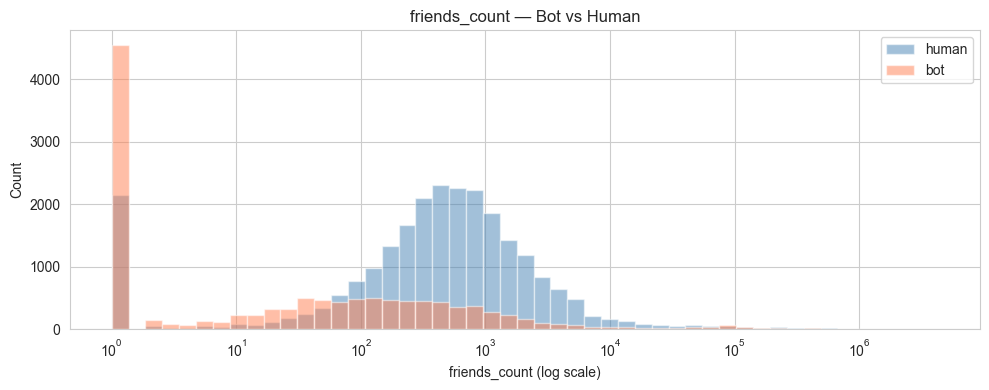

In [14]:
plot_feature_distribution('friends_count', True)

**friends_count**: The most striking signal here — a huge spike of bots at exactly 1 friend (or 0), while human accounts follow a smooth bell curve centered around 10²–10³, suggesting many bots never bother to follow other accounts.

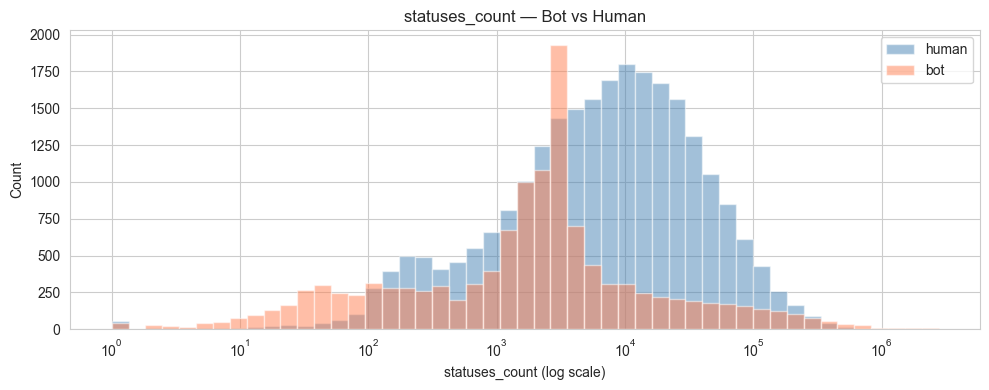

In [15]:
plot_feature_distribution('statuses_count', True)

**statuses_count**: Both classes overlap significantly in the 10³–10⁴ range, but bots show a sharper peak around 2,000–3,000 tweets while human accounts are spread more broadly toward higher counts — this feature alone is unlikely to be a strong discriminator.

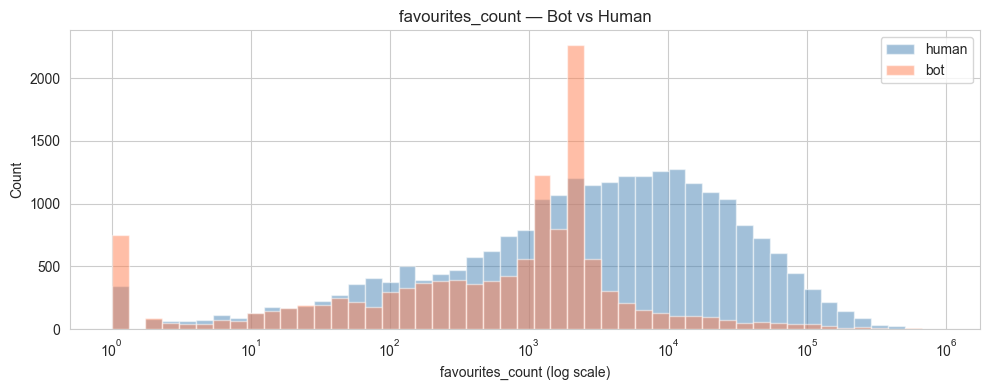

In [16]:
plot_feature_distribution('favourites_count', True)

**favourites_count**: Similar pattern to friends_count — a large spike of bots near zero (accounts that never "like" anything), while humans are distributed broadly across 10²–10⁵, suggesting bots tend not to engage with other users' content.

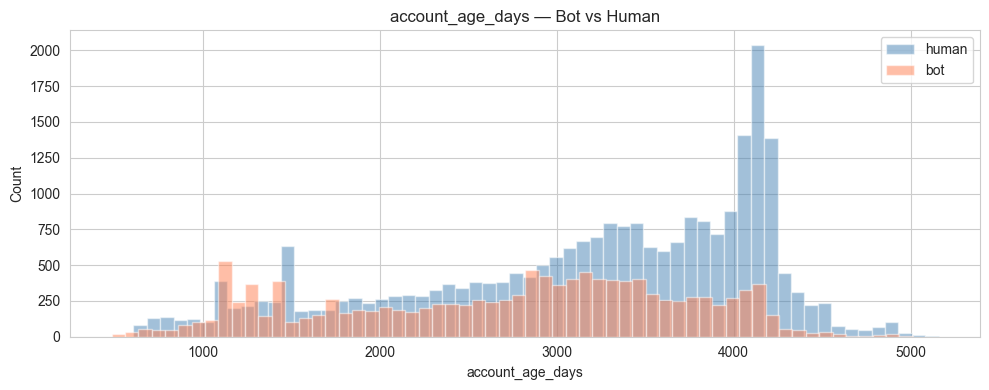

In [17]:
plot_feature_distribution('account_age_days', False)

**account_age_days**: Human accounts skew heavily toward older ages (3,500–4,500 days), while bot accounts cluster around 1,000–1,500 days old — bots in this dataset tend to be newer accounts, which aligns with real-world patterns of fake account creation in waves.

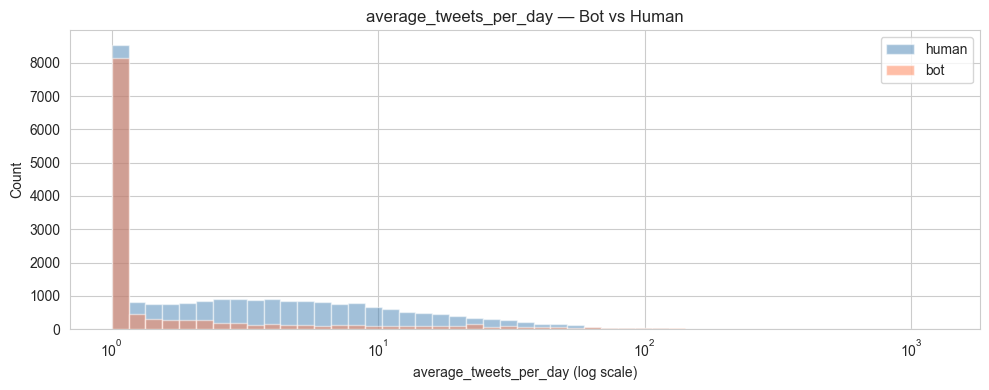

In [20]:
plot_feature_distribution('average_tweets_per_day', True)

**average_tweets_per_day**: Both classes are dominated by a massive spike at ~1 tweet per day, making this raw feature difficult to use on its own — the distributions are nearly indistinguishable outside of a thin tail of high-volume accounts.

## Correlation Analysis

The heatmap below shows pairwise Pearson correlations among numeric features and the binary target (`is_bot`). Look for features that are strongly correlated with the target and for pairs of features that are highly correlated with each other (potential redundancy).

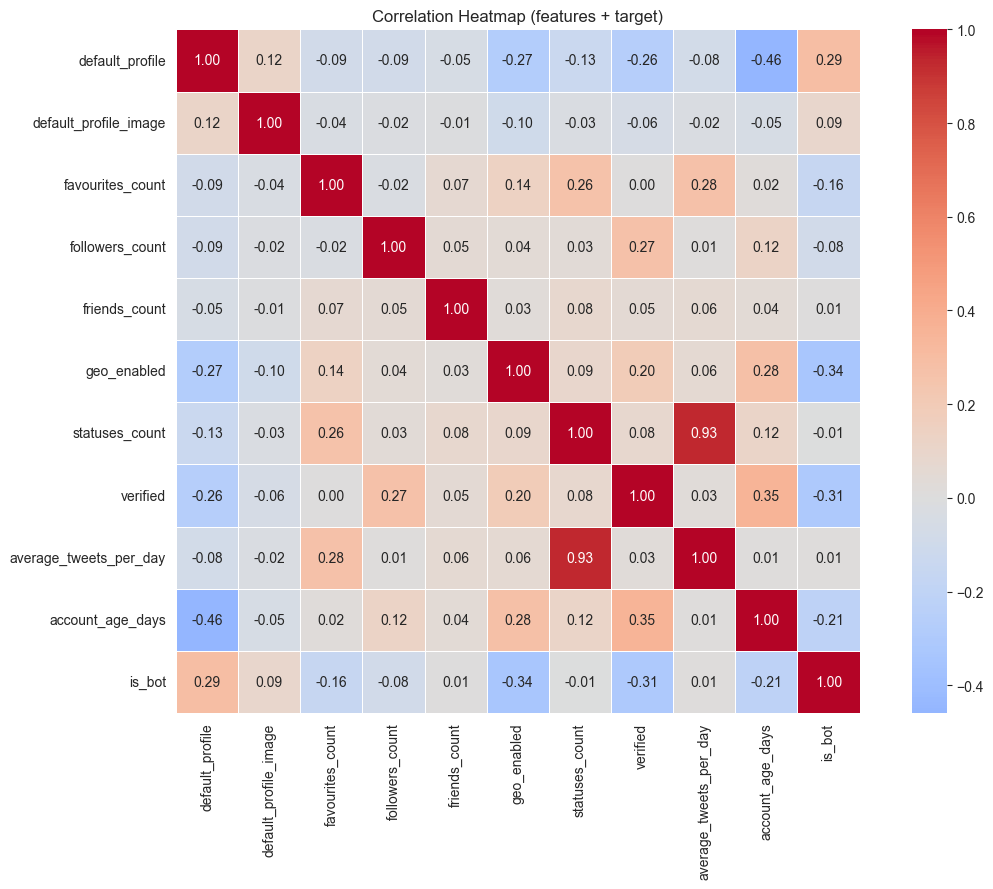

In [22]:
# Create a binary target column for correlation analysis
df['is_bot'] = (df['account_type'] == 'bot').astype(int)

corr_cols = [
    'default_profile', 'default_profile_image', 'favourites_count',
    'followers_count', 'friends_count', 'geo_enabled', 'statuses_count',
    'verified', 'average_tweets_per_day', 'account_age_days', 'is_bot'
]
corr_matrix = df[corr_cols].astype(float).corr()

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap (features + target)')
plt.tight_layout()
plt.show()

# Clean up temporary column
df.drop(columns=['is_bot'], inplace=True)


**statuses_count** and **average_tweets_per_day** are nearly redundant (r = 0.93) — this makes sense since one is derived from the other. We'll probably want to drop one.

**Features most correlated with the target** (**is_bot**): 
- geo_enabled (-0.34) (bots rarely enable geolocation)
- verified (-0.31) (bots are usuallt not verified)
- default_profile (0.29) (bots tend to keep the default profile)
- account_age_days (-0.21) 
-favourites_count (-0.16). 

No single feature is a slam dunk, but the combination of profile completeness signals (default_profile, default_profile_image, geo_enabled, verified) and account age together paint a clear picture.

**friends_count** is surprisingly uncorrelated with everything (all values near 0), which is interesting given how dramatic the distribution plot looked — that suggests the signal is in the shape of the distribution (the spike at zero) rather than a linear relationship, which is exactly the kind of thing tree-based models will pick up better than logistic regression.

## EDA Summary

Key findings that will inform our modeling decisions:

- **Class ratio:** ~67% human / 33% bot — moderately imbalanced. We should evaluate with F1 and AUC, not just accuracy.
- **Strongest linear correlations with target**: `geo_enabled`, `verified`, `default_profile`, and `account_age_days`. However, `friends_count` and `favourites_count` show dramatic nonlinear separation (bots spike at zero) that tree-based models should capture well.
- **Redundancy:** `statuses_count` and `average_tweets_per_day` are nearly perfectly correlated (r = 0.93). We keep both since tree-based models handle redundancy well.
- **Skewness:** `followers_count`, `friends_count`, `statuses_count`, and `favourites_count` are heavily right-skewed (skewness 7–34). StandardScaler will help logistic regression; tree models are unaffected.
- **Boolean features:** `verified` is rare among bots (2.5%) but common among humans (29%), making it a strong discriminator. `default_profile_image` skews toward bots (3% vs 0.7%) but the base rate is very low, so it will only help on a small slice of accounts.
- **Missing values** only affect text/URL columns that we will drop, so no imputation is needed for our numeric features.

# Data Preprocessing

The feature selection, engineering, and cleanup steps have been completed for you. Your tasks in this section are to **split the data** and **scale the features**.

## Feature Selection

We drop columns that are identifiers, free text, or URLs — these are not useful as numeric features for our models.

| Dropped Column | Reason |
|---------------|--------|
| `Unnamed: 0` | Row index, not a feature |
| `id` | Unique Twitter ID, not predictive |
| `created_at` | Raw timestamp (already captured by `account_age_days`) |
| `description` | Free text — would require NLP to use |
| `location` | Free text with inconsistent formatting |
| `profile_background_image_url` | URL string, not a numeric feature |
| `profile_image_url` | URL string, not a numeric feature |
| `screen_name` | Unique handle, not predictive |
| `lang` | Categorical with 48 levels — low signal, adds complexity |

In [36]:
drop_cols = [
    'Unnamed: 0', 'id', 'created_at', 'description', 'location',
    'profile_background_image_url', 'profile_image_url', 'screen_name', 'lang'
]
df = df.drop(columns=drop_cols)
print(f'Remaining columns ({len(df.columns)}): {list(df.columns)}')

Remaining columns (11): ['default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days', 'account_type']


## Feature Engineering

We create three derived ratio features that capture behavioral patterns useful for bot detection:

1. **`follower_friend_ratio`** = `followers_count / (friends_count + 1)` — Measures "popularity efficiency." Real influencers have high ratios (many followers, few following). Bots often follow many accounts but get few followers back, producing ratios near zero.

2. **`follower_acq_rate`** = `followers_count / (account_age_days + 1)` — Measures how fast the account gained followers. Sudden spikes (very new account with many followers) can indicate purchased followers or coordinated bot networks.

3. **`engagement_rate`** = `favourites_count / (statuses_count + 1)` — Measures how much the account "likes" relative to how much it posts. Bots tend to post a lot but rarely engage with other content by liking it.

In [37]:
df['follower_friend_ratio'] = df['followers_count'] / (df['friends_count'] + 1)
df['follower_acq_rate'] = df['followers_count'] / (df['account_age_days'] + 1)
df['engagement_rate'] = df['favourites_count'] / (df['statuses_count'] + 1)

print('New features created:')
print(df[['follower_friend_ratio', 'follower_acq_rate', 'engagement_rate']].describe().round(3))

New features created:
       follower_friend_ratio  follower_acq_rate  engagement_rate
count           3.743800e+04          37438.000        37438.000
mean            1.441006e+04             99.462            2.341
std             5.449992e+05            614.739           27.296
min             0.000000e+00              0.000            0.000
25%             4.570000e-01              0.014            0.174
50%             1.407000e+00              0.135            0.656
75%             2.848100e+01              2.745            1.316
max             8.699048e+07          27007.215         3184.875


## Handle Missing Values

All columns with missing values were text/URL fields that we already dropped. Let's confirm there are no remaining nulls.

In [38]:
missing = df.isnull().sum()
print(f'Total missing values: {missing.sum()}')
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print('No missing values — ready for modeling.')

Total missing values: 0
No missing values — ready for modeling.


## Prepare Features and Target

We separate the feature matrix `X` (all columns except the label) from the target vector `y` (the `account_type` column, encoded as 1 = bot, 0 = human).

In [39]:
X = df.drop(columns=['account_type'])
y = (df['account_type'] == 'bot').astype(int)  # 1 = bot, 0 = human

print(f'Features shape: {X.shape}')
print(f'Feature columns: {list(X.columns)}')
print(f'\nTarget distribution:')
print(y.value_counts().rename({0: 'human (0)', 1: 'bot (1)'}))

Features shape: (37438, 13)
Feature columns: ['default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days', 'follower_friend_ratio', 'follower_acq_rate', 'engagement_rate']

Target distribution:
human (0)    25013
bot (1)      12425
Name: account_type, dtype: int64


## Train/Test Split

Split the data into training and test sets.

**Requirements:**
- Use an 80/20 split
- Use `random_state=42` for reproducibility
- Use stratification to preserve the class ratio in both sets

*Hint: check the `stratify` parameter of `train_test_split`.*

In [ ]:
# YOUR CODE: Split the data into training and test sets
# X_train, X_test, y_train, y_test = ...



# Verify the split
print(f'Training set: {X_train.shape[0]} samples')
print(f'Test set:     {X_test.shape[0]} samples')
print(f'\nTraining class distribution:\n{y_train.value_counts(normalize=True).round(3)}')
print(f'\nTest class distribution:\n{y_test.value_counts(normalize=True).round(3)}')

## Feature Scaling

Standardize the features so each has mean 0 and standard deviation 1. This is important for logistic regression, which is sensitive to feature scales.

**Requirements:**
- Use `StandardScaler`
- **Fit** the scaler on the training set only
- **Transform** both the training and test sets

*Why fit on train only? To avoid data leakage — the test set should be treated as unseen data.*

In [ ]:
# YOUR CODE: Scale the features
# scaler = StandardScaler()
# X_train_scaled = ...
# X_test_scaled = ...


# Model 1: Logistic Regression (Baseline)

Start with logistic regression as a baseline. It's fast, interpretable, and gives us a reference point for comparison. If a more complex model can't beat logistic regression, the added complexity isn't worth it.

In [ ]:
# YOUR CODE: Train a logistic regression model
# - Initialize LogisticRegression (use max_iter=1000 to ensure convergence)
# - Fit on the SCALED training data
# - Generate predictions on the SCALED test data
# - Generate predicted probabilities on the SCALED test data (use .predict_proba())
#   Note: predict_proba returns probabilities for BOTH classes.
#   You want the probability of the positive class (bot), which is typically the second column: [:, 1]




# Model 2: Random Forest

Now train a random forest — an ensemble of decision trees that handles nonlinear relationships and feature interactions without needing explicit feature engineering. Random forests are also less sensitive to feature scaling, but we'll use the scaled data for consistency.

In [ ]:
# YOUR CODE: Train a random forest classifier
# - Initialize RandomForestClassifier with n_estimators=200 and random_state=42
# - Fit on the SCALED training data
# - Generate predictions on the SCALED test data
# - Generate predicted probabilities on the SCALED test data (positive class: [:, 1])




# Evaluation & Comparison

Use the helper function below to evaluate both models. It will print a classification report, plot a confusion matrix, and plot a ROC curve.

In [ ]:
def evaluate_model(model_name, y_true, y_pred, y_proba):
    """Print classification report, plot confusion matrix and ROC curve for a model."""

    print(f'=== {model_name} ===')
    print()
    print(classification_report(y_true, y_pred, digits=3))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred, ax=axes[0], cmap='Blues', colorbar=False
    )
    axes[0].set_title(f'{model_name} — Confusion Matrix')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='steelblue', lw=2, label=f'AUC = {roc_auc:.3f}')
    axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random (AUC = 0.5)')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'{model_name} — ROC Curve')
    axes[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()
    print()

## Evaluate Logistic Regression

In [ ]:
# YOUR CODE: Call evaluate_model for logistic regression
# evaluate_model('Logistic Regression', y_test, y_pred_lr, y_proba_lr)


## Evaluate Random Forest

In [ ]:
# YOUR CODE: Call evaluate_model for random forest
# evaluate_model('Random Forest', y_test, y_pred_rf, y_proba_rf)


## Model Comparison Questions

Answer each question in 1–2 sentences.

**1.** Which model had higher F1 score on the **bot** class?

*Your answer:*

**2.** Look at the confusion matrices. Which model produces more **false positives** (real users wrongly flagged as bots)? Which produces more **false negatives** (bots that slip through)?

*Your answer:*

**3.** Imagine this model is deployed on a real social media platform. Which type of error is more damaging: banning a real user (false positive) or letting a bot through (false negative)?

*Your answer:*

# Feature Importance

One advantage of random forests is that they provide a built-in measure of feature importance — how much each feature contributes to reducing impurity across all trees in the forest.

In [ ]:
# Feature importance from the random forest model (pre-filled)

# NOTE: If you used different variable names for your random forest model or feature matrix,
# update 'rf_model' and 'X_train_scaled' below to match your code.

feature_names = X.columns  # original feature names before scaling
importances = rf_model.feature_importances_

# Sort by importance
sorted_idx = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(sorted_idx)), importances[sorted_idx], color='steelblue')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_xlabel('Feature Importance (Gini)')
ax.set_title('Random Forest — Feature Importance')
plt.tight_layout()
plt.show()

## Feature Importance Questions

**1.** What are the top 3 most important features according to the random forest?

*Your answer:*

**2.** Does this match what you saw in the EDA plots above? (Yes/no, plus one sentence explaining why.)

*Your answer:*

# Reflection

Answer each question in 1–2 sentences.

**1.** What was the main advantage of random forest over logistic regression on this problem (or vice versa)?

*Your answer:*

**2.** Name one thing you would try to improve this model if you had more time.

*Your answer:*

**3.** What's one thing you learned or found surprising in this project?

*Your answer:*

---

# Optional Enhancements

The sections below are **not required**. They are opportunities to explore further if you have time and interest. Starter code is provided to help you get going.

## Enhancement A: Try XGBoost

XGBoost is a gradient boosting library that often achieves state-of-the-art results on tabular data. Train an XGBoost classifier and compare it to your previous models.

In [ ]:
# Optional: XGBoost
# First, install xgboost if needed (uncomment the line below)
# !pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

# YOUR CODE: Fit the model, generate predictions and probabilities, then evaluate
# xgb_model.fit(...)
# y_pred_xgb = ...
# y_proba_xgb = ...
# evaluate_model('XGBoost', y_test, y_pred_xgb, y_proba_xgb)

## Enhancement B: Hyperparameter Tuning

Use grid search with cross-validation to find better hyperparameters for your random forest.

In [ ]:
# Optional: Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# YOUR CODE: Run grid search
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=1
# )
# grid_search.fit(X_train_scaled, y_train)
# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best CV F1 score: {grid_search.best_score_:.3f}')

## Enhancement C: Threshold Tuning

The default classification threshold is 0.5, but the optimal threshold depends on how you want to balance precision and recall. Plot the precision-recall curve and experiment with different thresholds.

In [ ]:
# Optional: Precision-Recall curve and threshold tuning
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Plot precision-recall curve for your best model
# Example using random forest probabilities:
# PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf)
# plt.title('Random Forest — Precision-Recall Curve')
# plt.show()

# Try a custom threshold:
# custom_threshold = 0.6  # experiment with different values
# y_pred_custom = (y_proba_rf >= custom_threshold).astype(int)
# print(f'\nResults at threshold = {custom_threshold}:')
# print(classification_report(y_test, y_pred_custom, digits=3))

## Enhancement D: Try an SVM

Support Vector Machines find the maximum-margin decision boundary between classes. Try an SVM with an RBF kernel and compare to your other models.

In [ ]:
# Optional: SVM
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    probability=True,  # needed for predict_proba and ROC curves
    random_state=42
)

# YOUR CODE: Fit the model, generate predictions and probabilities, then evaluate
# Note: SVM can be slow on large datasets. If it takes too long, try using a
# subset of the training data, e.g. X_train_scaled[:5000]

# svm_model.fit(...)
# y_pred_svm = ...
# y_proba_svm = ...
# evaluate_model('SVM (RBF)', y_test, y_pred_svm, y_proba_svm)

---

# Submission Checklist

Before submitting, make sure you have:

- [ ] Train/test split with stratification
- [ ] Features scaled with StandardScaler (fit on train only)
- [ ] Logistic regression model trained and evaluated
- [ ] Random forest model trained and evaluated
- [ ] Model comparison questions answered
- [ ] Feature importance questions answered
- [ ] Reflection questions answered

**To submit:** Share a link to your completed notebook (Google Colab or GitHub) in the #project-showcase channel in Discord. 